In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("importing the libraries:")

importing the libraries:


In [4]:
print("Loading the dataset")

purchase_df = pd.read_csv("purchase_behaviour.csv")
transaction_df = pd.read_csv("transaction_data.csv")

Loading the dataset


In [5]:
print(purchase_df.head(5))
print(transaction_df.head(5))


   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&On

In [7]:
top_profitable_prod = (transaction_df.groupby(["PROD_NBR", "PROD_NAME"])['TOT_SALES'].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(3))

In [9]:
print(top_profitable_prod)

    PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


In [10]:
loyal_customers = (transaction_df.groupby("LYLTY_CARD_NBR")["TXN_ID"].count().reset_index().rename(columns={"TXN_ID": "NUM_TRANSACTIONS"}).sort_values(by="NUM_TRANSACTIONS", ascending=False))

In [11]:
print("Merging")

loyal_cust_behavior = loyal_customers.merge(purchase_df, on="LYLTY_CARD_NBR", how="left")

Merging


In [12]:
loyal_customers_summary = (loyal_cust_behavior.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])['NUM_TRANSACTIONS'].sum().reset_index().sort_values(by="NUM_TRANSACTIONS", ascending=False))

In [13]:

print("\nMost Loyal Customer Segments:\n", loyal_customers_summary.head(3))


Most Loyal Customer Segments:
                 LIFESTAGE PREMIUM_CUSTOMER  NUM_TRANSACTIONS
6          OLDER FAMILIES           Budget             23160
13               RETIREES       Mainstream             21466
19  YOUNG SINGLES/COUPLES       Mainstream             20854


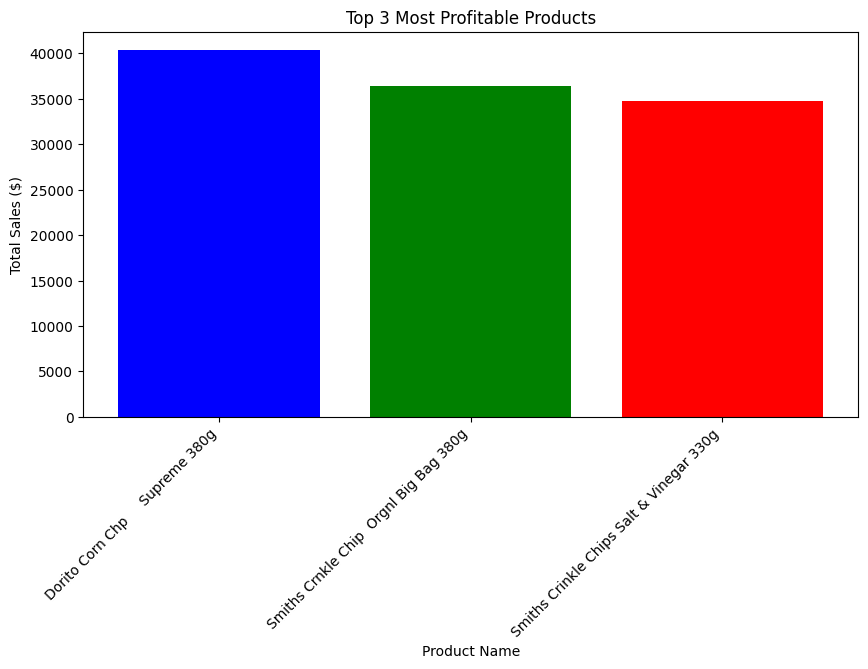

In [14]:
# Visualization: Top Profitable Products
plt.figure(figsize=(10, 5))
plt.bar(top_profitable_prod['PROD_NAME'], top_profitable_prod['TOT_SALES'], color=['blue', 'green', 'red'])
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.title("Top 3 Most Profitable Products")
plt.xticks(rotation=45, ha="right")
plt.show()

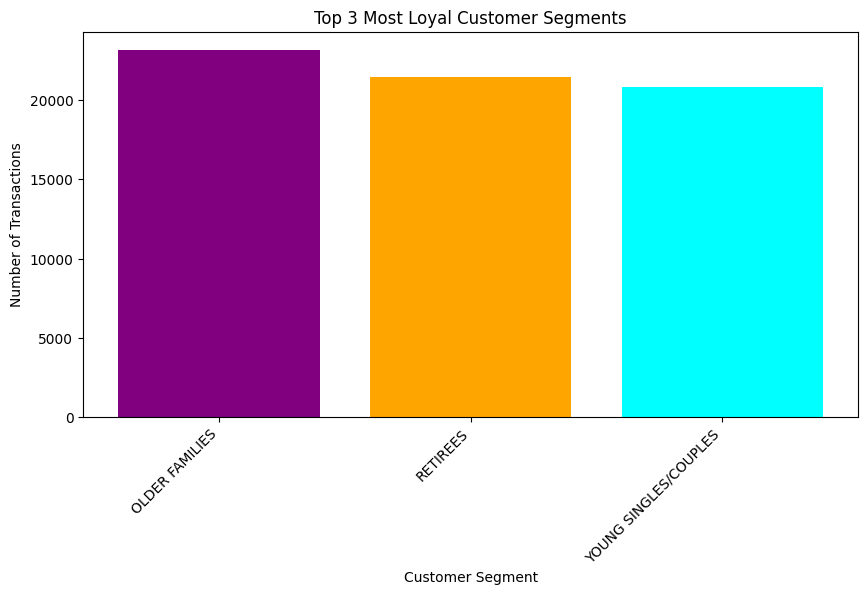

In [16]:
# Visualization: Most Loyal Customer Segments
plt.figure(figsize=(10, 5))
plt.bar(loyal_customers_summary['LIFESTAGE'][:3], loyal_customers_summary['NUM_TRANSACTIONS'][:3], color=['purple', 'orange', 'cyan'])
plt.xlabel("Customer Segment")
plt.ylabel("Number of Transactions")
plt.title("Top 3 Most Loyal Customer Segments")
plt.xticks(rotation=45, ha="right")
plt.show()